# Lecture 10

 Lesson Objectives 
- Runge-Kutta Methods
___

### Runge-Kutta Methods

The idea behind Runge-Kutta (RK) or single step methods is the following
- Take multiple fractional time steps with a single time step
- Sum up the contributions of the $f(t,y)$ evaluated at these fractional time steps in a manner that maintains conststency
- Self-Starting: Apart from an initial value, there's no other information needed. Not true with Multi-Step Methods.

Here the formulation from the Fundamental Theorem of Calculus is useful:
$$y_{i+1}-y_{i}=\int_{t_{i}}^{t_{i+1}}y'dt\qquad =\int_{t_{i}}^{t_{i+1}}f(t,y)dt$$

Runge Kutta Methods can be either explicit of implicit. 

If it is implicit, then $f(t,y)$ is evaluated at points in the interval $(t_{i},t_{i+1}]$ where $y$ is not known (we are given $y_{i}$), such as $y_{i+1}$ or $y_{i+1/2}$. The following are a few implicit RK methods

##### Implicit Midpoint Rule 
$$y_{i+1}=y_{i}+hf(t_{i+1/2},y_{i+1/2})$$

##### Implicit Trapezoid Rule 
$$y_{i+1}=y_{i}+\frac{h}{2}\left(f(t_{i},y_{i})+f(t_{i+1},y_{i+1})\right)$$

Explicit methods use approximations to the points that are in $(t_{i},t_{i+1}]$, for instance 
$$Y=y_{i}+hf(t_{i},y_{i})=y_{i+1}+O(h^{2})$$
However, this means there are multiple stages to explicit RK methods. For instance, the equivalent explicity methods are

##### Explicit Midpoint Rule
$$Y=y_{i}+\frac{h}{2}f(t_{i},y_{i})$$
$$y_{i+1}=y_{i}+hf(t_{i+1/2},Y)$$

(note $t_{i+1/2}=t_{i}+h/2$)

##### Explicit Trapezoid Rule (Huen's Method)
$$Y=y_{i}+hf(t_{i},y_{i})$$
$$y_{i+1}=y_{i}+\frac{h}{2}\left(f(t_{i},y_{i})+f(t_{i+1},Y)\right)$$

There are number of other methods that can be created in a similar manner. Another two stage method is Ralston's Method,

##### Ralston's Method
$$Y=y_{i}+\frac{2h}{3}f(t_{i},y_{i})$$
$$y_{i+1}=y_{i}+\frac{h}{4}\left(f(t_{i},y_{i})+3f(t_{i+2/3},Y)\right)$$


______

Below is an example with Huen's Methods (RK2) for 
$$y'=-y^{2},\qquad y(1)=1, \qquad t\in[1,10]$$


In [5]:
import time

print(time.time())

1582830260.384164


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def Huen(h,f,t,yold):
    Y=yold+h*f(t,yold)
    ynew=yold+(h/2.)*(f(t,yold)+f(t+h,Y))
    return ynew

def FE(h,f,t,yold):
    ynew=yold+h*f(t,yold)
    return ynew

def fun1(t,y):
    feval=-6*y
    return feval


y0=1 #initial value
T=10 #final time
h=.1 # Timestep size
Nt=int(T/h) # number of timesteps
t=np.linspace(0,10,Nt)
y_RK2=np.zeros(t.size)
y_FE=np.zeros(t.size)
y_RK2[0]=y0
y_FE[0]=y0

t0=time.time()
for i in range(0,Nt-1):
    y_RK2[i+1]=Huen(h,fun1,t[i],y_RK2[i])
t_RK2=time.time()-t0

t0=time.time()
for i in range(0,Nt-1):
    y_FE[i+1]=FE(h,fun1,t[i],y_FE[i])
t_FE=time.time()-t0

print('Forward Euler took:', t_FE)
print('RK2 took:', t_RK2)

y_true=np.exp(-6*t)

plt.figure(1)
plt.plot(t,y_RK2,'-r',t,y_FE,'-g',t,y_true,'-b')
plt.ylabel('y')
plt.xlabel('t')

plt.figure(2)
plt.plot(t,abs(y_RK2-y_true),'-r',t,abs(y_FE-y_true),'-g')
plt.ylabel('error')
plt.xlabel('t')


Forward Euler took: 0.0001480579376220703
RK2 took: 0.00024008750915527344


Text(0.5, 0, 't')

# ____
Generalizing the formula for $n$-stages, let

$$k_{n}=hf(t_{i}+c_{n}h,y_{i}+h\sum_{j}^{n-1}a_{n,j}k_{j}$$
$$y_{i+1}=y_{i}+\sum_{j=1}^{n}b_{j}k_{j}$$

Consistency is maintained if 
$$\sum_{j=1}^{n}b_{j}=1$$ and $$\sum_{j=1}^{n-1}a_{n,j}=c_{n}$$



We can represent RK methods with Butcher Tableaus (done in class, hard to draw in Markdown)

One of the classic RK methods is the following four stage RK method 

**Classic RK45 (4th order global, 5th order local)**
$$k_1=hf(t_i,y_i)$$
$$k_2=hf(t_i+h/2,y_i+\frac{1}{2}k_1)$$
$$k_3=hf(t_i+h/2,y_i+\frac{1}{2}k_2)$$
$$k_4=hf(t_i+h,y_i+k_3)$$
$$y_{i+1}=y_{i}+\left(\frac{1}{6}k_{1}+\frac{2}{6}k_{2}+\frac{2}{6}k_{3}+\frac{1}{6}k_{4}\right)$$


If we consider 
$$y_{i+1}=y_{i}+\int_{t_{i}}^{t_{i+1}}y'dt$$
and think of $k_{2}$ and $k_{3}$ are approximations to $hy'(t_{i+1/2})$, then what we're doing is applying Simpson's rule to the integral with our approximations

$$\int_{t_{i}}^{t_{i+1}}y'dt\approx \frac{h}{6}(y'(t_{i})+4y'(t_{i+1/2})+y'(t_{i+1}))$$
$$\approx\frac{1}{6}(k_{1}+(2k_{2}+2k_{3})+k_{4})$$
____
Implementing it for the previous IVP,


FE took: 0.009786128997802734
RK23 took: 0.019222021102905273
RK45 took: 0.03469586372375488


Text(0.5, 0, 't')

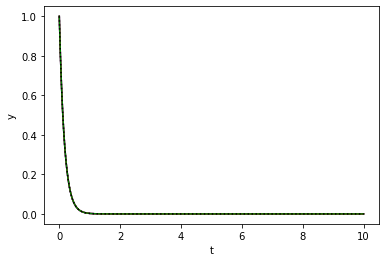

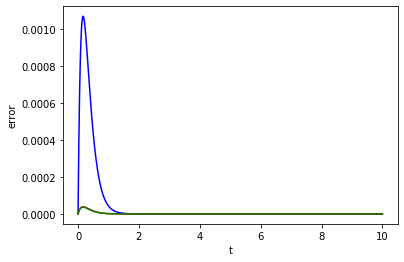

In [10]:
def RK45Classic(h,f,t,yold):
    k1=h*f(t,yold)
    k2=h*f(t+h/2,yold+k1/2)
    k3=h*f(t+h/2,yold+k2/2)
    k4=h*f(t+h,yold+k3)
    ynew=yold+(1/6)*(k1+2*k2+2*k3+k4)
    return ynew

y0=1 #initial value
T=10 #final time
h=.001 # Timestep size
Nt=int(T/h) # number of timesteps
t=np.linspace(0,10,Nt)


y_FE=np.zeros(t.size)
y_RK23=np.zeros(t.size)
y_RK45=np.zeros(t.size)
y_FE[0]=y0
y_RK23[0]=y0
y_RK45[0]=y0

t0=time.time()
for i in range(0,Nt-1):
    y_FE[i+1]=FE(h,fun1,t[i],y_FE[i])
t_FE=time.time()-t0

t0=time.time()
for i in range(0,Nt-1):
    y_RK23[i+1]=Huen(h,fun1,t[i],y_RK23[i])
t_RK23=time.time()-t0

t0=time.time()
for i in range(0,Nt-1):
    y_RK45[i+1]=RK45Classic(h,fun1,t[i],y_RK45[i])
t_RK45=time.time()-t0



print('FE took:', t_FE)
print('RK23 took:', t_RK23)
print('RK45 took:', t_RK45)

y_true=np.exp(-6*t)

plt.figure(1)
plt.plot(t,y_FE,'-b',t,y_RK23,'-r',t,y_RK45,'-g',t,y_true,':k')
plt.ylabel('y')
plt.xlabel('t')

plt.figure(2)
plt.plot(t,abs(y_FE-y_true),'-b',t,abs(y_RK23-y_true),'-r',t,abs(y_RK45-y_true),'-g')
plt.ylabel('error')
plt.xlabel('t')
